Saving synthetic_ecommerce_data.csv to synthetic_ecommerce_data (22).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8350 entries, 0 to 8349
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Session_ID                  8350 non-null   int64  
 1   User_ID                     8350 non-null   int64  
 2   Session_Duration (seconds)  8350 non-null   int64  
 3   CTR (%)                     8350 non-null   float64
 4   Bounce_Rate (%)             8350 non-null   float64
 5   Conversion_Rate (%)         8350 non-null   float64
 6   Pages_Viewed                8350 non-null   int64  
 7   Purchase_Made               8350 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 522.0 KB
Conversion rate: 2.002398081534772
                            Purchase_Made  Session_Duration (seconds)  \
Purchase_Made                    1.000000                   -0.010139   
Session_Duration (

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5119760479041916
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.52      0.51       821
           1       0.52      0.51      0.51       849

    accuracy                           0.51      1670
   macro avg       0.51      0.51      0.51      1670
weighted avg       0.51      0.51      0.51      1670

Confusion Matrix: [[424 397]
 [418 431]]


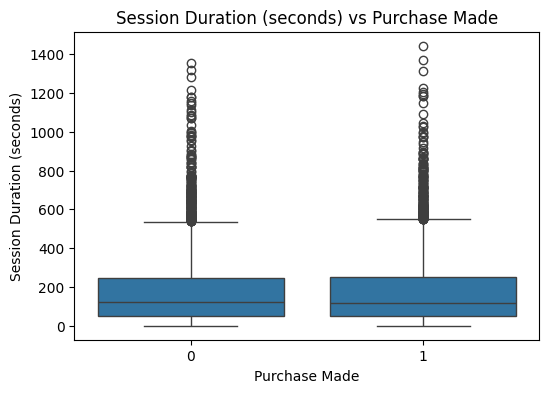

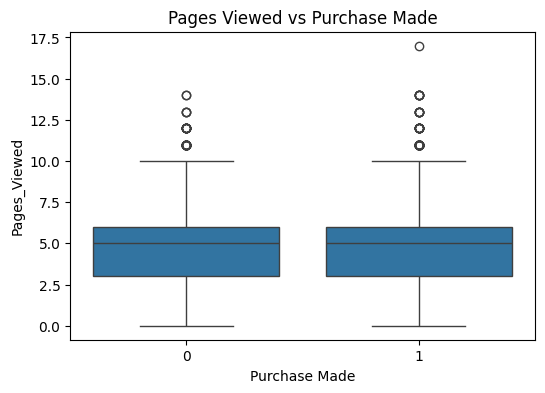

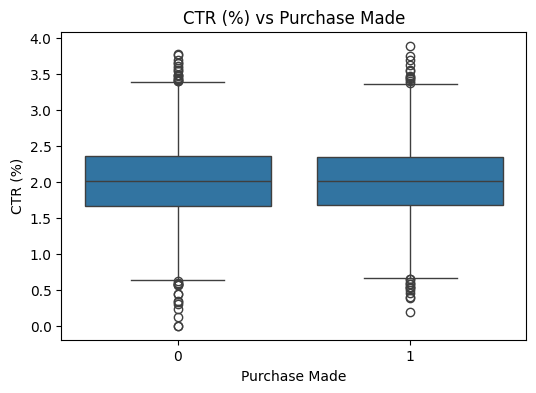

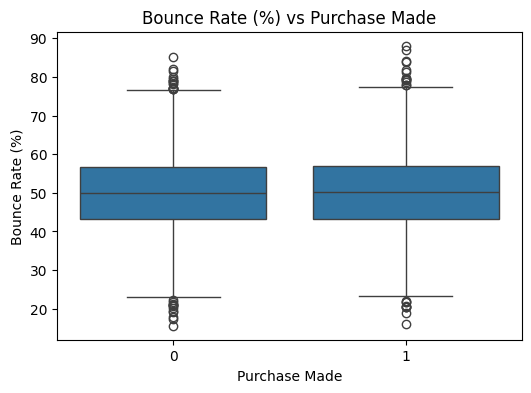

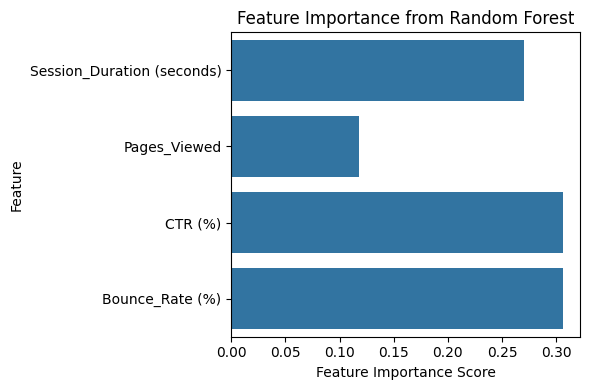

In [24]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('synthetic_ecommerce_data.csv')
df.shape
df.info()
df.isnull().sum()
df.describe()

df['Purchase_Made'].value_counts(normalize = True)
total_session = df.shape[0]
total_purchase = df[df['Purchase_Made'] == 1].shape[0]
conversion_rate = total_session / total_purchase
print(f"Conversion rate: {conversion_rate}")

df.groupby('Purchase_Made')[['Session_Duration (seconds)', 'Pages_Viewed', 'CTR (%)', 'Bounce_Rate (%)']].mean()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(x = "Purchase_Made", y = "Session_Duration (seconds)", data = df)
plt.title("Session Duration (seconds) vs Purchase Made")
plt.xlabel('Purchase Made')
plt.ylabel('Session Duration (seconds)')

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(x = "Purchase_Made", y = "Pages_Viewed", data = df)
plt.title("Pages Viewed vs Purchase Made")
plt.xlabel('Purchase Made')
plt.ylabel('Pages_Viewed')

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(x = "Purchase_Made", y = "CTR (%)", data = df)
plt.title("CTR (%) vs Purchase Made")
plt.xlabel('Purchase Made')
plt.ylabel('CTR (%)')

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(x = "Purchase_Made", y = "Bounce_Rate (%)", data = df)
plt.title("Bounce Rate (%) vs Purchase Made")
plt.xlabel("Purchase Made")
plt.ylabel("Bounce Rate (%)")

cols_of_interest = ['Purchase_Made', "Session_Duration (seconds)", "Pages_Viewed", "CTR (%)", "Bounce_Rate (%)"]
corr_df = df[cols_of_interest]
correlation_matrix = corr_df.corr(method = 'pearson')
print(correlation_matrix)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x = df[["Session_Duration (seconds)", "Pages_Viewed", "CTR (%)", "Bounce_Rate (%)"]]
y = df[['Purchase_Made']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train_scaled, y_train.values.ravel())
y_pred = model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
importances = model.feature_importances_
features = x_train.columns
plt.figure(figsize=(6,4))
sns.barplot(x = importances, y = features)
plt.title("Feature Importance from Random Forest")
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()